In [ ]:
#LSM CLASSIC
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Parameters for the American put option
S0 = 100  # initial stock price
K = 100   # strike price
r = 0.05  # risk-free rate
sigma = 0.3  # volatility
T = 1.0  # time to maturity (in years)
M = 50  # number of time steps
N = 10000  # number of simulations

# Generate random paths for stock prices
np.random.seed(42)
dt = T / M
discount_factor = np.exp(-r * dt)

# Function to simulate asset paths using geometric Brownian motion
def generate_asset_paths(S0, r, sigma, T, M, N):
    dt = T / M
    dW = np.random.normal(0, np.sqrt(dt), (N, M))
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for t in range(1, M + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * dW[:, t-1])
    return S

# Generate asset price paths
S = generate_asset_paths(S0, r, sigma, T, M, N)

# Payoff function for an American put option
def put_payoff(S, K):
    return np.maximum(K - S, 0)

# LSM algorithm for pricing American put options
def LSM_american_put(S, K, r, T, M, N):
    dt = T / M
    discount_factor = np.exp(-r * dt)

    # Initialize cash flows at maturity (payoff at maturity)
    payoff = put_payoff(S[:, -1], K)
    cash_flows = payoff

    # Backward induction to find optimal exercise strategy
    for t in range(M-1, 0, -1):
        in_the_money = put_payoff(S[:, t], K) > 0
        X = S[in_the_money, t]
        Y = cash_flows[in_the_money] * discount_factor

        # Regression on the in-the-money paths to estimate continuation value
        if len(X) > 0:
            poly = Polynomial.fit(X, Y, deg=2)  # Polynomial regression (degree 2)
            continuation_value = poly(X)
            exercise_value = put_payoff(X, K)

            # Determine which paths should be exercised early
            exercise = exercise_value > continuation_value
            cash_flows[in_the_money] = np.where(exercise, exercise_value, Y / discount_factor)

    # Discount the cash flows to the present
    option_price = np.mean(cash_flows) * np.exp(-r * dt)
    return option_price

# Price the American put option
price = LSM_american_put(S, K, r, T, M, N)
print(f"American Put Option Price: {price:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 540.4583 - val_loss: 500.6369
Epoch 2/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 492.7419 - val_loss: 488.9226
Epoch 3/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 407.9056 - val_loss: 511.6315
Epoch 4/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 411.1765 - val_loss: 416.2677
Epoch 5/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 503.4300 - val_loss: 432.6325
Epoch 6/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 430.2266 - val_loss: 414.0749
Epoch 7/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 452.4326 - val_loss: 512.8578
Epoch 8/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 447.6371 - val_loss: 429.4955
Epoch 9/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 521.5573 - val_loss: 464.5232
Epoch 10/200
12508/12508 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 453.7499 - val_loss: 434.0584
Epoch 11/200
12508/12508 ━━━━━━━━━━━━━━

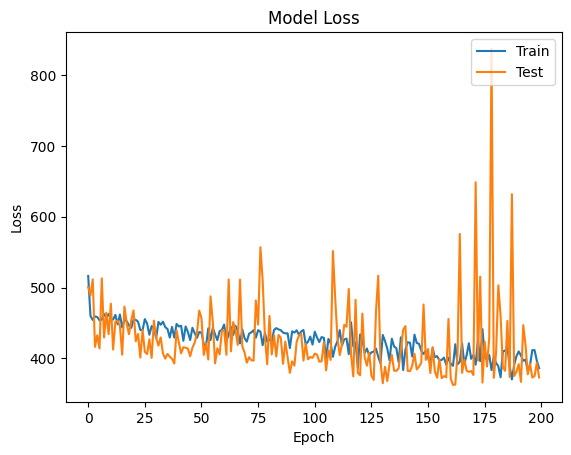

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
309/309 ━━━━━━━━

In [3]:
#LSM NEURAL NET
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a CSV file
# Assuming the CSV file has the following columns: 'Stock_Price', 'Option_Price', 'Strike_Price', 'Risk_Free_Rate', 'Volatility'
df = pd.read_csv('final_dataset.csv')

# Extract the relevant columns from the dataset
S_hist = df['UNDERLYING_LAST'].values  # Stock prices over time for different paths
P_hist = df['P_TRADE'].values  # Option prices over time for different paths
K_hist = df['STRIKE'].values  # Strike prices (can be constant or varying)
r_hist = df['P_VEGA'].values  # Risk-free rates (could vary over time or be constant)
sigma_hist = df['P_IV'].values  # Volatilities (could vary over time or be constant)

# Generate neural network for continuation value approximation with S, K, r, and sigma as inputs
def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))  # Input: [S, K, r, sigma]
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output: continuation value
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize and train the neural network
nn_model = create_nn()

# Estimate Y_hist using the method described before (discount future option prices)
Y_hist = np.zeros_like(P_hist)  # Y_hist should be a 1D array
for t in range(P_hist.shape[0] - 2, -1, -1):
    Y_hist[t] = P_hist[t + 1] * np.exp(-r_hist[t] * (1/252))  # dt assumed as daily step
Y_hist[-1] = 0  # Continuation value at maturity is zero

# Prepare training data
# X_hist will be a 2D array with [stock price, strike price, risk-free rate, volatility] as input
S_train = S_hist  # Stock prices
K_train = K_hist  # Strike price (if constant, else use K_hist[:, 0] for varying strikes)
r_train = r_hist  # Risk-free rate (constant, or use r_hist[:, 0] if varying)
sigma_train = sigma_hist  # Volatility (constant, or use sigma_hist[:, 0] if varying)

X_hist= np.column_stack((S_train, K_train, r_train, sigma_train))

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_hist, Y_hist, test_size=0.1, random_state=42)

# Train the neural network on the training set
history = nn_model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Make predictions on the test set
Y_pred = nn_model.predict(X_test).flatten()

# Calculate accuracy metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error (MSE) on the test set: {mse:.4f}')
print(f'R-squared (R2) on the test set: {r2:.4f}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()





# Parameters for the American put option
S0 = S_hist[-1]  # initial stock price
K = K_hist[-1]  # strike price, could also take a constant value
r = 0.05  # risk-free rate
sigma = sigma_hist[-1]  # volatility
T = 1.0  # time to maturity (in years)
M = 50  # number of time steps
N = 10000  # number of simulations

# Generate random paths for stock prices
np.random.seed(42)
dt = T / M
discount_factor = np.exp(-r * dt)

# Function to simulate asset paths using geometric Brownian motion
def generate_asset_paths(S0, r, sigma, T, M, N):
    dt = T / M
    dW = np.random.normal(0, np.sqrt(dt), (N, M))
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for t in range(1, M + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * dW[:, t-1])
    return S

# Generate asset price paths
S = generate_asset_paths(S0, r, sigma, T, M, N)

# Payoff function for an American put option
def put_payoff(S, K):
    return np.maximum(K - S, 0)

# LSM algorithm for pricing American put options
def LSM_american_put(S, K, r, T, M, N):
    dt = T / M
    discount_factor = np.exp(-r * dt)

    # Initialize cash flows at maturity (payoff at maturity)
    payoff = put_payoff(S[:, -1], K)
    cash_flows = payoff.copy()  # Initialize cash flows

    # Backward induction to find optimal exercise strategy
    for t in range(M-1, 0, -1):
        in_the_money = put_payoff(S[:, t], K) > 0
        X = S[in_the_money, t]
        Y = cash_flows[in_the_money] * discount_factor

        # Neural network prediction for continuation value
        if len(X) > 0:
            # Prepare input data [S_t, K, r, sigma] for the neural network
            K_t = np.full_like(X, K)  # Assume constant strike price (modify if strike varies)
            r_t = np.full_like(X, r)  # Risk-free rate (constant or use r_hist)
            sigma_t = np.full_like(X, sigma)  # Volatility (constant or use sigma_hist)

            X_nn_input = np.column_stack((X, K_t, r_t, sigma_t))

            # Predict continuation value using the neural network
            continuation_value = nn_model.predict(X_nn_input).flatten()  # Ensure it's 1D

            exercise_value = put_payoff(X, K)

            # Determine which paths should be exercised early
            exercise = exercise_value > continuation_value
            cash_flows[in_the_money] = np.where(exercise, exercise_value, Y / discount_factor)

    # Discount the cash flows to the present
    option_price = np.mean(cash_flows) * np.exp(-r * dt)
    return option_price

# Price the American put option
price = LSM_american_put(S, K, r, T, M, N)
print(f"American Put Option Price: {price:.2f}")